In [125]:
import pandas as pd 
import numpy as np
# importing data
data = pd.read_csv('https://s3.amazonaws.com/talent-assets.datacamp.com/recipe_site_traffic_2212.csv')
data.head()


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [126]:
# checking for null values
data.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [127]:
# it is clear that the recipe column and index column are the same. so getting rid of one of them
data.set_index('recipe' , inplace=True)
data.reset_index(drop = True , inplace = True)

In [128]:
# inspecting the 'high_traffic' target variable first
data[data['high_traffic'].isna()]
# the instructions mention that if high_traffic is present then 'high' is in the column else null. 

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
2,914.28,42.68,3.09,2.88,Breakfast,1,NaN
4,27.05,1.85,0.80,0.53,Beverages,4,NaN
6,183.94,47.95,9.75,46.71,Chicken Breast,4,NaN
7,299.14,3.17,0.40,32.40,Lunch/Snacks,4,NaN
9,248.28,48.54,3.99,113.85,Chicken,2,NaN
...,...,...,...,...,...,...,...
932,1017.32,85.12,1.71,1.85,Potato,1,NaN
939,2283.29,34.34,5.12,17.57,Chicken Breast,6,NaN
940,1337.50,49.91,0.76,57.90,Chicken,4,NaN
942,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN


In [129]:
# it is therefore safe to assume that high needs to be replaced by 1 and null by 0 in this column


data["high_traffic"] = data["high_traffic"].apply(lambda x: 1 if x == "High" else 0)
data.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,NaN,NaN,NaN,NaN,Pork,6,1
1,35.48,38.56,0.66,0.92,Potato,4,1
2,914.28,42.68,3.09,2.88,Breakfast,1,0
3,97.03,30.56,38.63,0.02,Beverages,4,1
4,27.05,1.85,0.80,0.53,Beverages,4,0


In [130]:
data.isnull().sum() # shows that there are 52 missing values in 4 columns


calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

In [131]:
#lets check if they are all from the same rows/ this would mean that for these specific recipies there was perhaps issues retrieving the data
null_rows = data.isnull().any(axis =1)
data[null_rows]



,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,NaN,NaN,NaN,NaN,Pork,6,1
23,NaN,NaN,NaN,NaN,Meat,2,0
48,NaN,NaN,NaN,NaN,Chicken Breast,4,0
82,NaN,NaN,NaN,NaN,Meat,4,1
89,NaN,NaN,NaN,NaN,Pork,6,1
116,NaN,NaN,NaN,NaN,Chicken Breast,6,1
121,NaN,NaN,NaN,NaN,Dessert,2,1
136,NaN,NaN,NaN,NaN,One Dish Meal,2,1
149,NaN,NaN,NaN,NaN,Potato,2,1
187,NaN,NaN,NaN,NaN,Pork,4,1


In [132]:
data.dtypes
# we can see that both the category and servings are objects. the former will be onehotencoded, but the latter is actually numeric.

calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic      int64
dtype: object

In [133]:
data['category'].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

In [134]:

# convert 'servings' column to numeric
data['servings'] = pd.to_numeric(data['servings'], errors='coerce')

In [135]:
# this may have created more null values (and it has!)
data.isnull().sum()

calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         3
high_traffic     0
dtype: int64

**------- Exploratory Data Analysis-------**

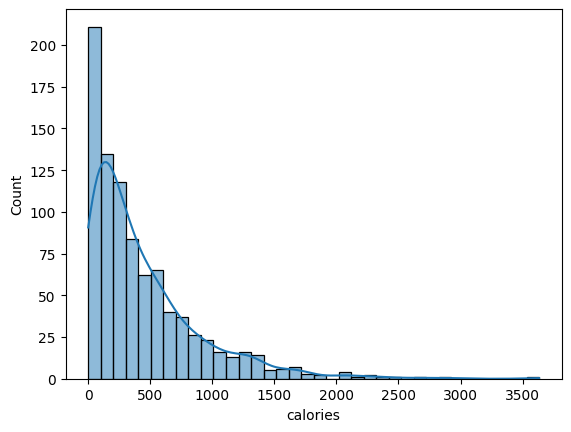

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# histogram of the count of recipies against calories
sns.histplot(data=data, x='calories', kde=True)
plt.show()

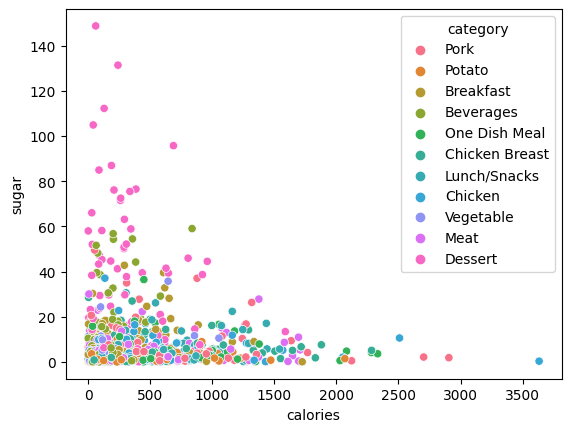

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot of calories vs. protein
sns.scatterplot(data=data, x='calories', y='sugar', hue='category')
plt.show()
# shows visually that the highest foods in sugar are desserts

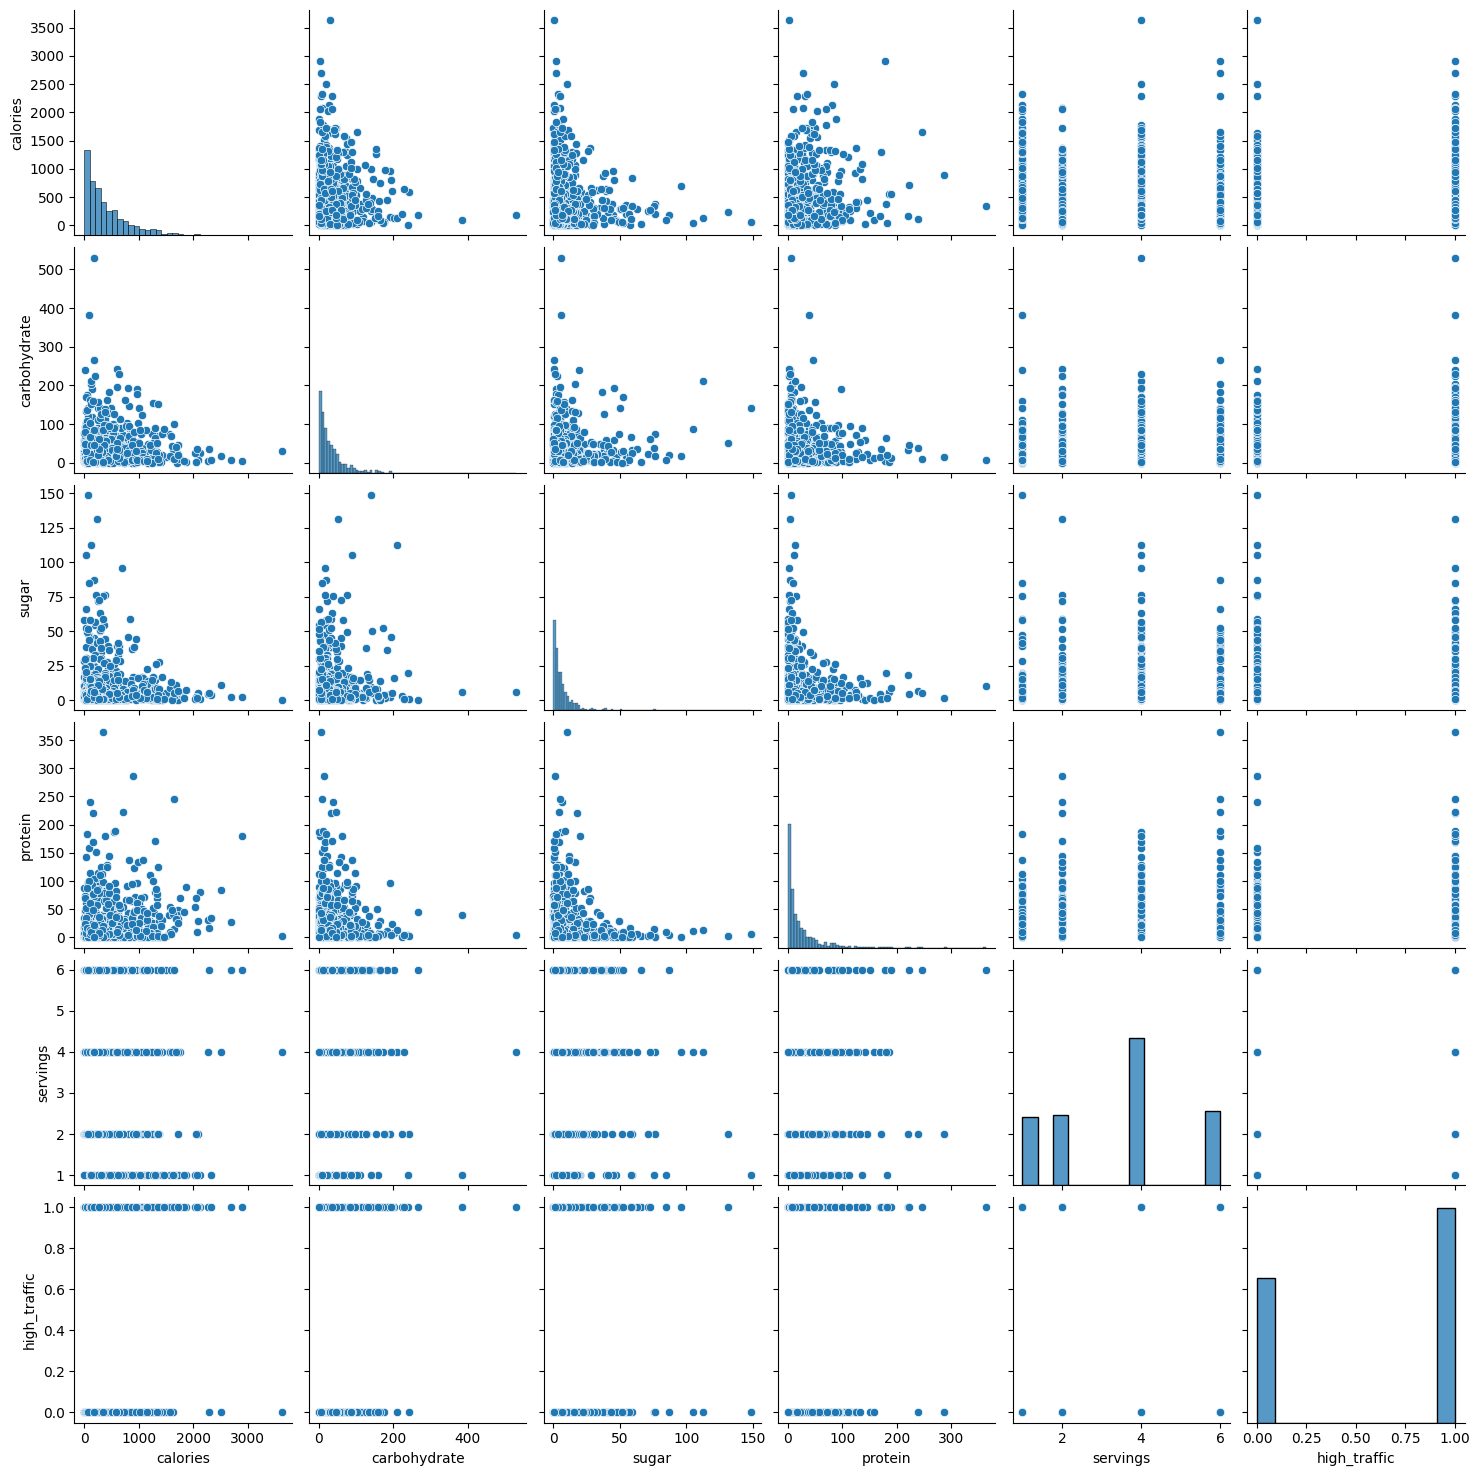

In [138]:
import seaborn as sns

# Create pair plot of all numeric variables
sns.pairplot(data=data.drop([ 'category'], axis=1).dropna())
plt.show()
# shows the structure of the correlations of the data

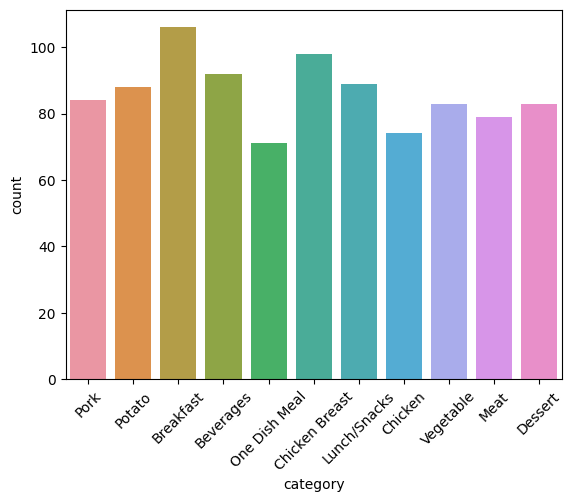

In [139]:
# Create bar chart of category column
sns.countplot(data=data, x='category')
plt.xticks(rotation=45)
plt.show()


<AxesSubplot: >

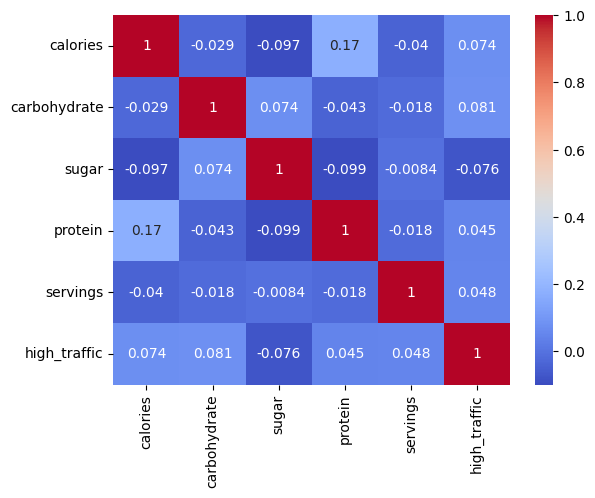

In [140]:
# Create a correlation matrix
corr_matrix = data.corr(method='pearson')

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# no collinearity between features present but also low correlation of the numerical features and the target var

**------- One Hot Encoding-------**

In [141]:
# one hot encode the category variable and make the final dataframe
one_hot_encoded = pd.get_dummies(data['category'] , drop_first=True)
data = pd.concat([data , one_hot_encoded] , axis =1)
data.drop('category' , axis =1 , inplace = True)
data.head()

,calories,carbohydrate,sugar,protein,servings,high_traffic,Breakfast,Chicken,Chicken Breast,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
0,NaN,NaN,NaN,NaN,6.0,1,0,0,0,0,0,0,0,1,0,0
1,35.48,38.56,0.66,0.92,4.0,1,0,0,0,0,0,0,0,0,1,0
2,914.28,42.68,3.09,2.88,1.0,0,1,0,0,0,0,0,0,0,0,0
3,97.03,30.56,38.63,0.02,4.0,1,0,0,0,0,0,0,0,0,0,0
4,27.05,1.85,0.80,0.53,4.0,0,0,0,0,0,0,0,0,0,0,0


In [142]:
# so the data contain missing values for all nutritional data 'calories' , 'carbohydrates' , 'sugar' , 'protein'
# while imputation is possible, it is decided that the data should be excluded.
data= data.dropna()
data.shape
data.describe()

,calories,carbohydrate,sugar,protein,servings,high_traffic,Breakfast,Chicken,Chicken Breast,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
count,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000
mean,433.484989,35.062971,9.043206,24.142018,3.454036,0.597534,0.118834,0.077354,0.105381,0.086323,0.088565,0.082960,0.075112,0.081839,0.093049,0.087444
std,450.997596,44.005332,14.699529,36.429244,1.736618,0.490670,0.323775,0.267303,0.307216,0.280998,0.284274,0.275976,0.263720,0.274272,0.290665,0.282643
min,0.140000,0.030000,0.010000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.145000,8.320000,1.687500,3.177500,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,287.010000,21.480000,4.545000,10.775000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,595.930000,44.907500,9.800000,30.015000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3633.160000,530.420000,148.750000,363.360000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**------- Splitting and Scaling Data-------**

In [143]:
# splitting to features and target variable
X = data.drop(columns = 'high_traffic' , axis =1)

y = np.ravel(data[['high_traffic']])


In [144]:
# splitting to test and training sets
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(X, y , test_size=0.3 , stratify=y, random_state = 42)


In [145]:

# from the desciption of the dataset above, some variables should be scaled as models that operate in linear space will likely be tested

from sklearn.preprocessing import PowerTransformer
columns_to_scale = ['calories' ,'carbohydrate', 'sugar', 'protein']
scaler = PowerTransformer()
#fit scaler to training first and transform
X_train_scaled = X_train.copy()
X_train_scaled.loc[: ,columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
# use the scaler object for the test
X_test_scaled = X_test.copy()
X_test_scaled.loc[: , columns_to_scale]  = scaler.transform(X_test[columns_to_scale] )

X_test_scaled.drop('Chicken Breast' , axis = 1)
X_train_scaled.drop('Chicken Breast' , axis = 1)

,calories,carbohydrate,sugar,protein,servings,Breakfast,Chicken,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
602,-1.222244,0.372519,0.003084,1.072382,2.0,0,0,0,0,0,0,0,0,0
466,-1.267683,-1.190586,0.921690,-1.384752,6.0,0,0,0,0,0,0,0,0,0
814,0.048603,0.644420,-1.818780,0.594895,4.0,0,0,0,0,0,0,0,0,0
853,0.309105,-0.682648,-1.933609,-1.515772,6.0,0,0,1,0,0,0,0,0,0
108,0.713376,0.572236,0.789011,-0.473627,6.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,-0.606824,0.119465,0.084888,0.510551,4.0,0,0,0,0,0,0,0,0,1
218,-0.447733,-2.080816,1.650702,-0.568150,6.0,0,0,1,0,0,0,0,0,0
690,-0.031468,0.072607,-0.810303,0.319336,1.0,0,1,0,0,0,0,0,0,0
773,0.688008,0.475545,0.130609,0.887538,1.0,0,0,0,0,0,0,0,0,0


In [146]:
X_train_scaled.describe()
# shows nicely distributed vars for the transformed columns

,calories,carbohydrate,sugar,protein,servings,Breakfast,Chicken,Chicken Breast,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
count,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,7.401487e-17,6.262797e-17,-3.416071e-17,-1.252559e-16,3.506410,0.112179,0.078526,0.123397,0.067308,0.083333,0.083333,0.086538,0.092949,0.086538,0.092949
std,1.000802e+00,1.000802e+00,1.000802e+00,1.000802e+00,1.718549,0.315840,0.269213,0.329157,0.250755,0.276607,0.276607,0.281383,0.290593,0.281383,0.290593
min,-2.634929e+00,-2.344429e+00,-1.960667e+00,-1.856970e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.272047e-01,-7.228450e-01,-7.573042e-01,-7.518458e-01,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.541972e-03,4.047234e-02,6.512380e-02,3.271983e-02,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.068746e-01,7.113794e-01,7.307152e-01,7.304830e-01,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.654003e+00,2.621205e+00,2.693257e+00,2.688820e+00,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
for column in columns_to_scale:
    std= X_train_scaled[column].std()
    mean= X_train_scaled[column].mean()
    
    # Calculate the cutoff
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off

    # Trim the outliers
    X_train_scaled = X_train_scaled[(X_train_scaled[column] < upper) 
                               & (X_train_scaled[column] > lower)]

# # The trimmed box plot
# trimmed_df[['ConvertedSalary']].boxplot()
# plt.show()

**------- Model testing-------**

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# I have included some good models to test as classifiers for our problem
# Fit the models and make predictions on the test set
models = [
    LogisticRegression(random_state =42),
    DecisionTreeClassifier(random_state =42),
    RandomForestClassifier(random_state =42),
    SVC(random_state =42),
    KNeighborsClassifier(),
    GaussianNB()
]
results = []
for model in models:
    model_name = type(model).__name__
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Model': model_name, 'Accuracy': accuracy})

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

results_df =results_df.sort_values(by='Accuracy', ascending= False)
print(results_df)

                    Model  Accuracy
2  RandomForestClassifier  0.772388
0      LogisticRegression  0.768657
3                     SVC  0.753731
5              GaussianNB  0.690299
1  DecisionTreeClassifier  0.652985
4    KNeighborsClassifier  0.634328


the best 3 performing models will be further explored


**------- Logistic regression-------**

In [150]:
# define a function to get cross validation score metrics
from sklearn.model_selection import cross_val_score
def get_cross_val_metrics(model, X , y , cv):
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    # Print the mean and standard deviation of the cross-validation scores
    print("Cross-validation scores: {}".format(cv_scores))
    print("Mean cross-validation score: {:.2f}".format(cv_scores.mean()))
    print("Standard deviation of cross-validation scores: {:.2f}".format(cv_scores.std()))

In [151]:
# the LogisticRegression takes us to some good accuracy, so lets optimise some parameters, check for regularization etc
from sklearn.model_selection import GridSearchCV
# Define the logistic regression classifier
lr = LogisticRegression()

# Define the parameter grid to search over
param_grid = {
    'penalty': ['none','l1', 'l2'],
    'C': [8,9,10,11,12],
    'solver': ['liblinear', 'sag']
}

# Create a GridSearchCV object
clf = GridSearchCV(lr, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
clf.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print(f'Best parameters: {clf.best_params_}')

# Evaluate the best model on the test data
print(f'Test accuracy: {clf.score(X_test_scaled, y_test)}')

Best parameters: {'C': 8, 'penalty': 'l2', 'solver': 'liblinear'}
Test accuracy: 0.8022388059701493


In [152]:
# The accuracy looks promising and we now have the optimal hyperparameters
# lets write a function to take a closer look of some important metrics

from sklearn.metrics import classification_report , confusion_matrix

def get_class_metrics(model,r1, r2):
    report = classification_report(r1, r2)
    matrix = confusion_matrix(r1,r2)
    print('{} , {} \n {} '.format(matrix, model, report)) 
    
# lets now rerun the model using the best_params

logreg_opt = LogisticRegression(C = 8, penalty= 'l2', solver= 'liblinear')

logreg_opt.fit(X_train_scaled , y_train)
y_pred_logreg_opt = logreg_opt.predict(X_test_scaled )

get_class_metrics('log_Reg_opt' , y_test,y_pred_logreg_opt)

[[ 78  30]
 [ 23 137]] , log_Reg_opt 
               precision    recall  f1-score   support

           0       0.77      0.72      0.75       108
           1       0.82      0.86      0.84       160

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268
 


In [153]:
get_cross_val_metrics(logreg_opt , X_train_scaled, y_train , 5)

Cross-validation scores: [0.688      0.728      0.68       0.776      0.78225806]
Mean cross-validation score: 0.73
Standard deviation of cross-validation scores: 0.04


In [154]:
# It was not mentioned so far in this notebook but there is a slight imbalance in the data favoring one class
from collections import Counter
count_dict = dict(Counter(y))
count_dict
# 0.6

{1: 533, 0: 359}

In [155]:
# lets try running with class weights

class_weights = {0: 0.6, 1: 0.4}
logreg_opt = LogisticRegression(C = 8, penalty= 'l2', solver= 'liblinear')

logreg_opt.fit(X_train_scaled , y_train)
y_pred_logreg_opt = logreg_opt.predict(X_test_scaled )

get_class_metrics('log_Reg_opt' , y_test,y_pred_logreg_opt)

# results not as good 

[[ 78  30]
 [ 23 137]] , log_Reg_opt 
               precision    recall  f1-score   support

           0       0.77      0.72      0.75       108
           1       0.82      0.86      0.84       160

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268
 


In [156]:
from sklearn.feature_selection import RFECV

rfecv =RFECV(estimator =logreg_opt , step =1 , cv =5 , scoring = 'accuracy')
rfecv.fit(X_train_scaled , y_train)
print("Optimal number of features: {}".format(rfecv.n_features_))
print("Feature rankings: {}".format(rfecv.ranking_))

Optimal number of features: 7
Feature rankings: [7 6 9 5 8 4 3 2 1 1 1 1 1 1 1]


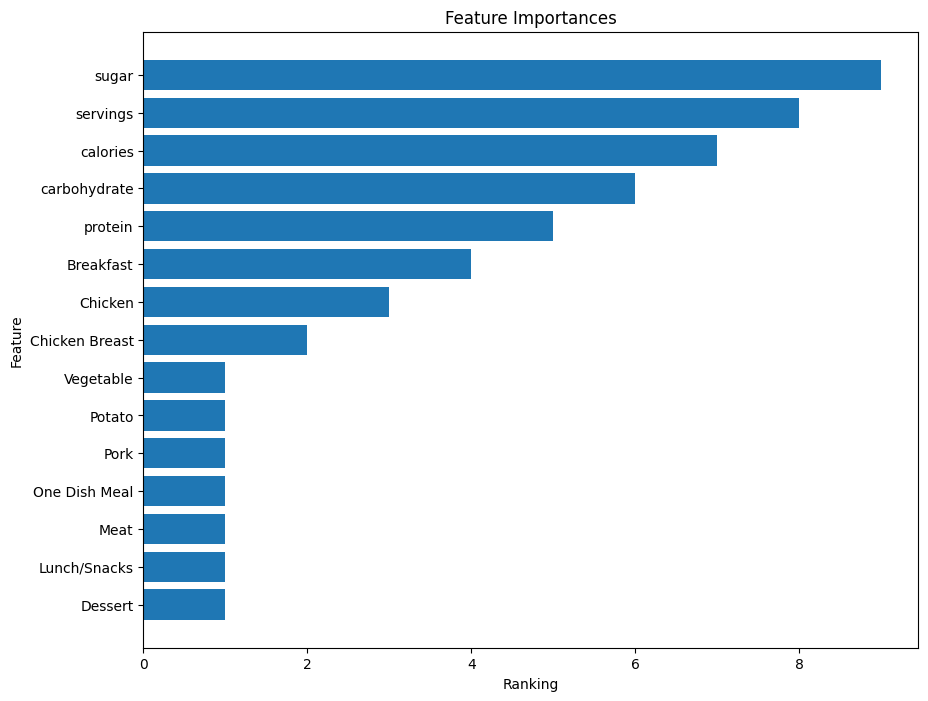

In [157]:

# Create a dictionary that maps feature names to their rankings
ranked_features = {}
for i in range(len(rfecv.ranking_)):
    ranked_features[X.columns[i]] = rfecv.ranking_[i]

# Sort the features by their rankings and extract their names and rankings
sorted_features = sorted(ranked_features.items(), key=lambda x: x[1])

# Extract the feature names and rankings as separate lists
feature_names = [f[0] for f in sorted_features]
feature_rankings = [f[1] for f in sorted_features]

plt.figure(figsize=(10,8))
plt.barh(feature_names, feature_rankings)
plt.title('Feature Importances')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.show()

**
------ XGboost classifier-------**

In [158]:
import xgboost as xgb

dmatrix = xgb.DMatrix(data= X_train , label = y_train)
dmatrix_test = xgb.DMatrix(data= X_test, label = y_test)
# Create the parameter dictionary: params
params = {"objective":"binary:logistic", "max_depth":4}
xgb_clf = xgb.train(dtrain = dmatrix , params = params )
cv_results = xgb.cv(dtrain=dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="error", as_pandas=True, seed=123)
print(cv_results)
print(((1-cv_results["test-error-mean"]).iloc[-1]))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.270032         0.041974         0.328526        0.018551
1          0.250801         0.020048         0.299679        0.025237
2          0.242788         0.017111         0.312500        0.017989
3          0.238782         0.013069         0.304487        0.023001
4          0.233173         0.011776         0.280449        0.014862
0.7195512820512822


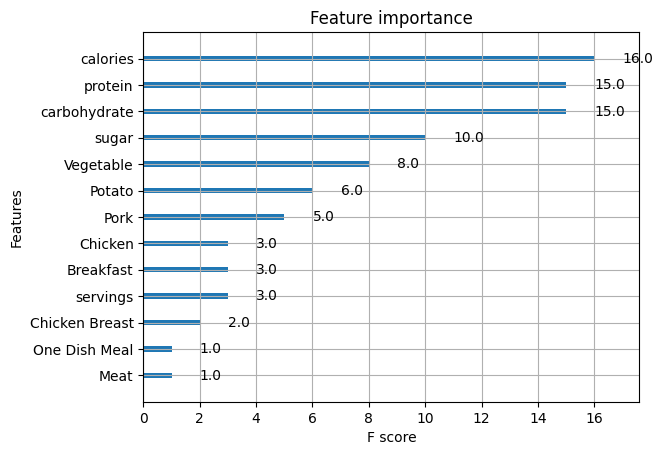

In [159]:
xgb.plot_importance(xgb_clf)
plt.show()

In [160]:
get_cross_val_metrics(logreg_opt , X_train_scaled, y_train, 5 )

Cross-validation scores: [0.688      0.728      0.68       0.776      0.78225806]
Mean cross-validation score: 0.73
Standard deviation of cross-validation scores: 0.04


In [161]:
from sklearn.metrics import roc_auc_score
# Define the XGB model with L1 regularization (Lasso)

model = xgb.XGBClassifier(
    objective='binary:logistic',
     # L1 regularization parameter (Lasso)
    random_state=42
)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50 , 100],
    'max_depth': [3, 4, 5],
    'min_child_weight': [ 3, 5],
    'gamma': [ 0.1, 0.2],
    'learning_rate': [0.1, 0.01],
    'alpha': [0, 0.1, 0.5, 1]
}

# Perform hyperparameter optimization with GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Evaluate the model on the test set using the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print(f"Test AUC: {auc:.4f}")

Best hyperparameters:  {'alpha': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 100}
Best score:  0.7930581188039408
Test AUC: 0.8281


In [162]:
from sklearn.metrics import roc_auc_score
# Define the XGB model with L1 regularization (Lasso)
model = xgb.XGBClassifier(
    objective='binary:logistic',
    reg_alpha=0.5, # L1 regularization parameter (Lasso)
    random_state=42 , gamma = 0.2 , learning_rate = 0.01, max_depth=4  , min_child_weight = 3 , n_estimators= 100
)

# Train the model with early stopping
model.fit(
    X_train , y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=10,
    verbose=False
)

# Evaluate the model on the test set
y_pred = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print(f"Test AUC: {auc:.4f}")
y_pred_xgb = model.predict(X_test)
get_class_metrics('XGB' , y_test, y_pred_xgb)

Test AUC: 0.8281
[[ 66  42]
 [ 24 136]] , XGB 
               precision    recall  f1-score   support

           0       0.73      0.61      0.67       108
           1       0.76      0.85      0.80       160

    accuracy                           0.75       268
   macro avg       0.75      0.73      0.74       268
weighted avg       0.75      0.75      0.75       268
 


In [163]:
get_cross_val_metrics(model , X_train, y_train, 5 )

Cross-validation scores: [0.712      0.736      0.688      0.664      0.67741935]
Mean cross-validation score: 0.70
Standard deviation of cross-validation scores: 0.03


**------ Support Vector Classifier-------**

In [164]:
from sklearn.svm import SVC

# Create a list of classifiers

svc = SVC(kernel = 'linear')
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
get_class_metrics('SVC' , y_test,y_pred_svc)
 #note , the linear kernel was best and this was tested so no further hyperparameter optimization is run here


[[ 80  28]
 [ 27 133]] , SVC 
               precision    recall  f1-score   support

           0       0.75      0.74      0.74       108
           1       0.83      0.83      0.83       160

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268
 


In [165]:
get_cross_val_metrics(svc , X_train_scaled, y_train , 5)

Cross-validation scores: [0.72       0.776      0.696      0.744      0.76612903]
Mean cross-validation score: 0.74
Standard deviation of cross-validation scores: 0.03


**------ Random Forest Classifier-------**

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    
}

# Define the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the grid search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.7195483870967742


In [167]:
rf = RandomForestClassifier(random_state=42 , max_depth = 10 , min_samples_leaf = 4 , min_samples_split=2 , n_estimators = 200)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

get_class_metrics('rf', y_test , y_pred_rf)

[[ 74  34]
 [ 27 133]] , rf 
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       108
           1       0.80      0.83      0.81       160

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268
 


In [168]:
get_cross_val_metrics(rf, X_train_scaled , y_train , 5)

Cross-validation scores: [0.752      0.728      0.712      0.688      0.71774194]
Mean cross-validation score: 0.72
Standard deviation of cross-validation scores: 0.02


**------ Combining classifiers by voting or stacking-------****

In [169]:
from sklearn.ensemble import VotingClassifier
logreg = LogisticRegression(C = 8, penalty= 'l2', solver= 'liblinear')
svc = SVC(kernel = 'linear') 
rf = RandomForestClassifier(random_state=42 , max_depth = 10 , min_samples_leaf = 4 , min_samples_split=2 , n_estimators = 200)
model = xgb.XGBClassifier(
    objective='binary:logistic',
    reg_alpha=0.5, # L1 regularization parameter (Lasso)
    random_state=42 , gamma = 0.2 , learning_rate = 0.01, max_depth=4  , min_child_weight = 3 , n_estimators= 100
)
estimators = [('logreg', logreg),  ('svc', svc) , ('rf' , rf) , ('xgb' , model)]
voting_clf = VotingClassifier(estimators=estimators, voting='hard')
voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)

get_class_metrics('voting' , y_test, y_pred_voting)

[[ 80  28]
 [ 27 133]] , voting 
               precision    recall  f1-score   support

           0       0.75      0.74      0.74       108
           1       0.83      0.83      0.83       160

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268
 


In [170]:
get_cross_val_metrics(voting_clf, X_train_scaled , y_train , 5)

Cross-validation scores: [0.736      0.744      0.696      0.76       0.79032258]
Mean cross-validation score: 0.75
Standard deviation of cross-validation scores: 0.03


stacking method

In [171]:
# all Logistic regression, SVC and rf, show some good traits so lets attempt combination via stacking classifier.
from sklearn.ensemble import StackingClassifier

# Define the base models
logreg = LogisticRegression(C = 8, penalty= 'l2', solver= 'liblinear')
svc = SVC(kernel = 'linear') 
rf = RandomForestClassifier(random_state=42 , max_depth = 10 , min_samples_leaf = 4 , min_samples_split=2 , n_estimators = 200)
model = xgb.XGBClassifier(
    objective='binary:logistic',
    reg_alpha=0.5, # L1 regularization parameter (Lasso)
    random_state=42 , gamma = 0.2 , learning_rate = 0.01, max_depth=4  , min_child_weight = 3 , n_estimators= 100
)


# Define the stacking model
estimators = [('logreg', logreg),  ('svc', svc) , ('xgb' , model)]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the stacking model
stack.fit(X_train_scaled, y_train)
get_class_metrics('stacking' , y_test, stack.predict(X_test_scaled))

[[ 80  28]
 [ 26 134]] , stacking 
               precision    recall  f1-score   support

           0       0.75      0.74      0.75       108
           1       0.83      0.84      0.83       160

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268
 


In [172]:
get_cross_val_metrics(stack, X_train_scaled , y_train , 5)

Cross-validation scores: [0.72       0.776      0.696      0.76       0.77419355]
Mean cross-validation score: 0.75
Standard deviation of cross-validation scores: 0.03


**plotting ROC and finding AUCs**

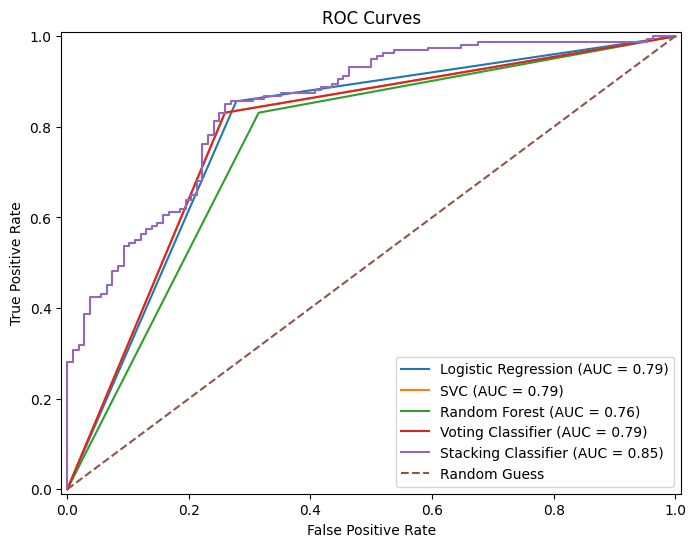

In [173]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create a list of models and their predicted probabilities
models = [('Logistic Regression', y_pred_logreg_opt, logreg_opt),           ('SVC', y_pred_svc, svc),           ('Random Forest', y_pred_rf, rf),          ('Voting Classifier', y_pred_voting, voting_clf),          ('Stacking Classifier', stack.predict_proba(X_test_scaled)[:, 1], stack)]

# Plot the ROC curves for each model
plt.figure(figsize=(8, 6))
for model_name, y_pred, model in models:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model_name, roc_auc))
    
# Plot the random guess curve
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
    
# Set the plot details
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()


Buisness metrics - 
Since, the business goal is to increase recipe pageviews, we can evaluate the model's performance by measuring the increase in pageviews for the recipes predicted as popular by the model. We can also compare the model's predictions to the actual recipe pageviews and calculate the correlation coefficient or root mean squared error to measure the model's accuracy.

in general, if the buisness is performing well and predicting recipes with a good level of accuracy then the model is perhaps achieving adequately well, otherwise further tuning is required

This concludes my analysis. In general there are a few things that I would attempt next if I had more time. The first one would be to do a log transformation instead of using Standard scaler. I suspect this may give slightly better results for some classifiers. In terms of the preprocessing steps, one may try 'mean' imputation for the values missing data in all nutritional characterictics, and see if this makes a difference. Alternatively seeing if any features could be combined in a feature engineering step would be also something to explore. In terms of the actual analysis and model fitting it is clear that there are several models, namely Logistic regression with L2 regularization(one may also explore reduntant features through this in future work), random Forrest, and SVC employing a linear kernel. Their combination through a majority vote classifier did not improve classification metrics, however using a stacking classifier of all three as initial estimators and a further LogReg as the final estimator (not optimised due to time constraints, other final classifiers may be attempted) did collectively improve classification performance. The results are reflected in the Mean cross-validation score: 0.75 with reasonably low variance across all folds. There is also a good balance of the precision/recall harmonic means (f1) for the classes 0 and 1. Additionally, the benefit of the stacking classifier is also outlined by the AUC value of 0.85 which shows significant improvement over the individual classifiers.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation